# EDA On Titanic Dataset

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load Data
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Basic Info
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Missing Values Check
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Missing Values Handeling
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Missing Values Check
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# Group-based Insights
print("\n--- Survival Rate by Sex ---")
print(df.groupby('Sex')['Survived'].mean())

print("\n--- Survival Rate by Pclass ---")
print(df.groupby('Pclass')['Survived'].mean())

print("\n--- Survival Rate by Sex & Pclass ---")
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())


--- Survival Rate by Sex ---
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

--- Survival Rate by Pclass ---
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

--- Survival Rate by Sex & Pclass ---
Sex     Pclass
female  1         1.0
        2         1.0
        3         1.0
male    1         0.0
        2         0.0
        3         0.0
Name: Survived, dtype: float64


# Visualizations

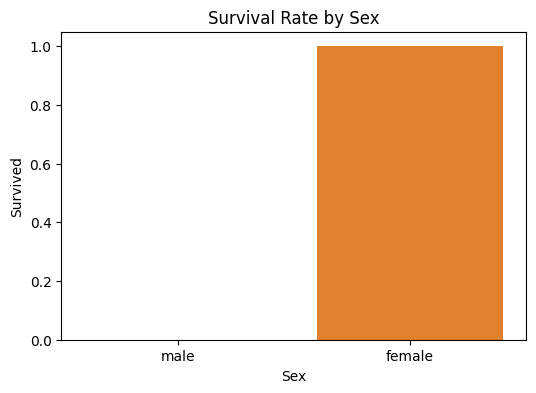

In [14]:
# Survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.savefig("survival_by_sex.png")
plt.show()

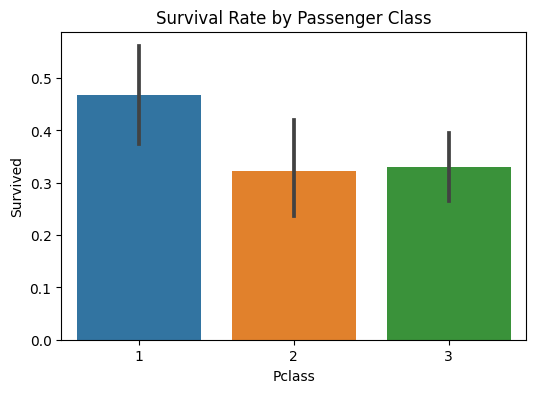

In [15]:
# Survival rate by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.savefig("survival_by_pclass.png")
plt.show()

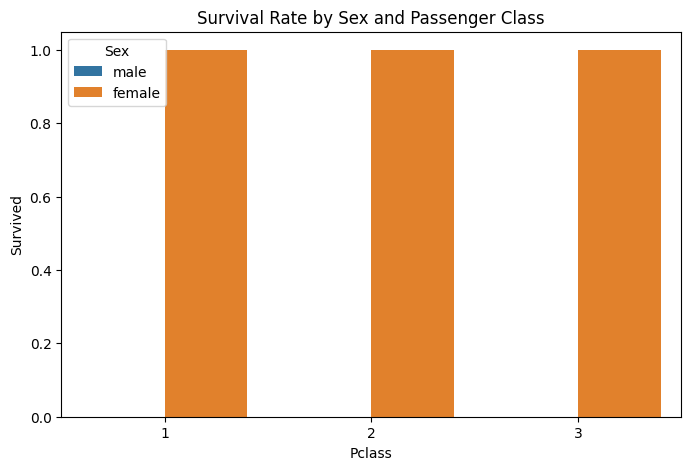

In [16]:
# BONUS - Survival rate by Sex & Pclass
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Sex and Passenger Class")
plt.savefig("survival_by_sex_pclass.png")
plt.show()

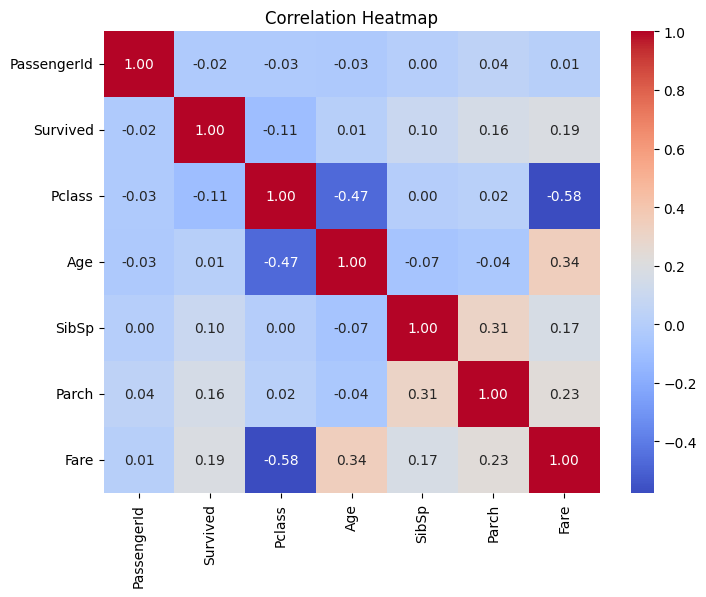

In [17]:
# BONUS - Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)  # numeric_only to avoid warning
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

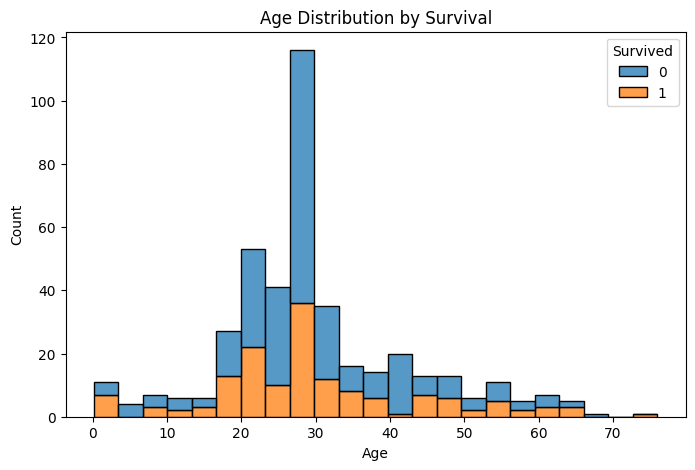

In [18]:
# BONUS - Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival")
plt.savefig("age_distribution_by_survival.png")
plt.show()

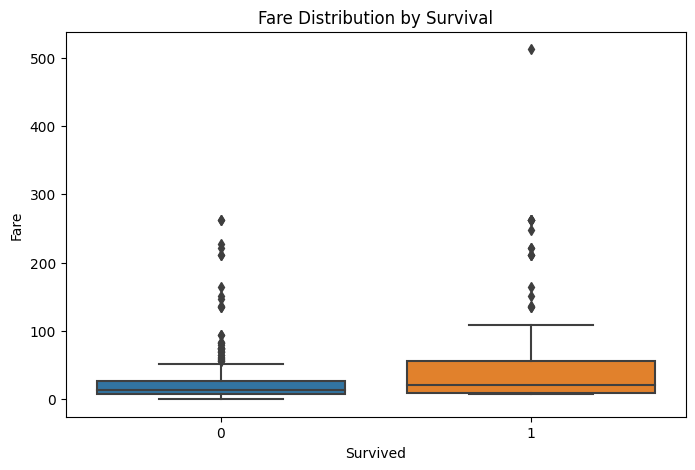

In [19]:
# Extra - Fare distribution by Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.savefig("fare_distribution_by_survival.png")
plt.show()